**CS596 - Machine Learning**
<br>
Date: **14 October 2020**


Title: **Lecture 7**
<br>
Speaker: **Dr. Shota Tsiskaridze**
<br>
Teaching Assistant: **Levan Sanadiradze**

Bibliography:
<br>
**Chapter 5** of Bishop, Christopher M., *Pattern Recognition and Machine Learning*, Springer, 2006 [1]

<h1 align="center">Neural Networks</h1>

<h3 align="center">Discussions</h3>

- We saw that models for **regression and classification**, that comprised **linear combinations** of **fixed basis functions** have **useful analytical** and **computational properties**;

- However, theit practical applicability was limited by the **curse of dimensionality**;


- **Curse of dimensionality**: with a fixed number of training samples, the predictive power of a classifier or regressor first increases as number of dimensions or features used is increased but then decreases.


- **One of the approach** is to **fix the number of basis functions** in advance but **allow** them to **be adaptive**.

- **Adaptive** means to use **parametric forms for the basis functions** in which the **parameter values** are **adapted during training**.


- The **most successful model** of this type in the context of pattern recognition is the **Neural Network (NN)**, also known as the **multilayer perceptron**.

<h3 align="center">What Does a Neuron Do?</h3>

- The **operations** done by each neurons are pretty simple :

  - First, it **adds up** the value of **every neurons** from the **previous column** it is connected to. 
  
  - There are **inputs** $(x_1, x_2, ..., x_n)$ coming to the neuron, so $n$ **neurons** of the previous column are connected to our neuron.
   
  - The values $x_i$ are multiplied by another variable called **weight** $(w_1, w_2, w_3)$ which determines the connection between the two neurons.
   
  - Each **connection of neurons** has its own **weight**, and those are the **only values** that will be **modified during** the **learning process**.
   
  - A **bias** value may be added to the total value calculated. 
   
  - **After** the **summations**, the **neuron** finally **applies** a function called **activation function** to the obtained value.

  <img src="images/L7_Neuron.jpeg" width="800" alt="Example" />
  

-  This scheme is also called **perceptron model**.

<h3 align="center">Neural Networks</h3>

- The **linear models** for **regression and classification** were **based** on based on **linear combinations of fixed nonlinear basis functions** $\phi_j(\mathbf{x})$:

  $$y(\mathbf{x}, \mathbf{w}) = f \left ( \sum_{j=1}^{M} w_j \phi_j (\mathbf{x}) \right ),$$
  
  where $f(\cdot)$ is a **nonlinear activation function** in the case of **classification** and is the **identity** in the case of **regression**.


- Our **goal** is to extend this model by **making the basis functions $\phi_j(\mathbf{x})$ depend on parameters** and then to **allow these parameters to be adjusted**, along with the coefficients $\{w_j\}$, during training.
- There are, of course, **many ways** to construct **parametric nonlinear basis functions**. 


- **Neural networks** use **basis functions** that itself is a **nonlinear function of a linear combination of the inputs**.


<img src="images/L7_DNN.jpg" width="500" alt="Example" />

<h3 align="center">Popular Types of Activation Functions</h3>

- Link: https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/

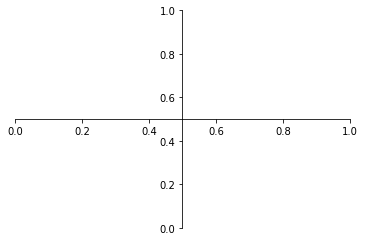

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

1. **Binary Step Function**

   If the input to the activation function is greater than a **threshold**, then the neuron is activated, else it is deactivated.



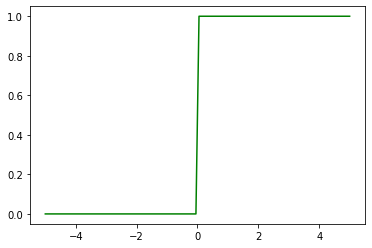

In [16]:
#define the function
def binary_step(x):
    if x<0:
        return 0
    else:
        return 1
    
#define the f(x) values
y = [binary_step(i) for i in x]

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

2. **Linear Function**

    Instead of a binary function, we can use a linear function. We can define the function as:

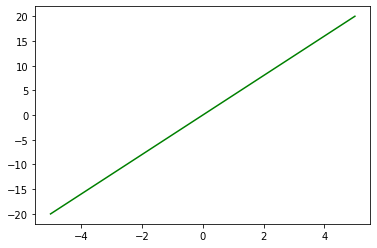

In [17]:
#define the function
def linear_function(x, alpha):
    return alpha*x
    
#define the f(x) values
alpha = 4
y = [linear_function(i, alpha) for i in x]

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

3. **Sigmoid Function**

    The next activation function that we are going to look at is the Sigmoid function. 
    
    It is one of the most widely used non-linear activation function. 
    
    Sigmoid transforms the values between the range $0$ and $1$.

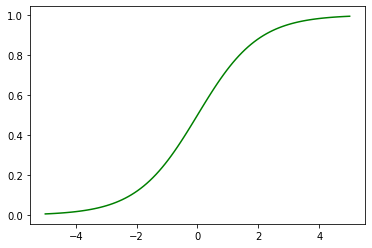

In [18]:
#define the function
def sigmoid_function(x):
    z = (1/(1 + np.exp(-x)))
    return z
    
#define the f(x) values
y = [sigmoid_function(i) for i in x]

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

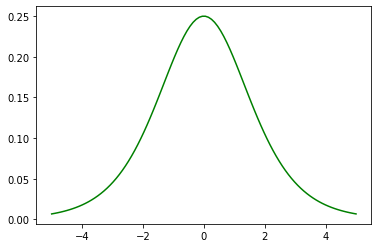

In [20]:
#define the f(x) values
y = [sigmoid_function(i)*(1-sigmoid_function(i)) for i in x]

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

4. **Hyperbolic Tangent Function**

    The tanh function is very similar to the sigmoid function. 
    
    The only difference is that it is symmetric around the origin. 
    
    The range of values in this case is from $-1$ to $1$. 
    
    Thus the inputs to the next layers will not always be of the same sign. 

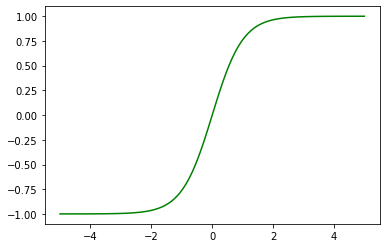

In [21]:
#define the function
def tanh_function(x):
    z = (2/(1 + np.exp(-2*x))) -1
    return z
    
#define the f(x) values
y = [tanh_function(i) for i in x]

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

5. **ReLU Function**

    The ReLU function is another non-linear activation function that has gained popularity in the deep learning domain.
    
    ReLU stands for Rectified Linear Unit. 
    
    The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.

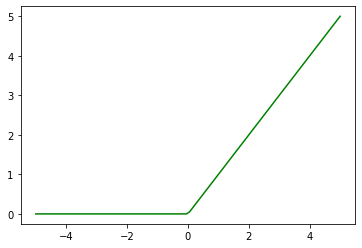

In [22]:
#define the function
def relu_function(x):
    if x<0:
        return 0
    else:
        return x
    
#define the f(x) values
y = [relu_function(i) for i in x]

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

6. **Leaky ReLU Function**

    Leaky ReLU function is nothing but an improved version of the ReLU function. 
    
    As we will see, for the ReLU function, the gradient is $0$ for $x<0$, which would deactivate the neurons in that region.

   Leaky ReLU is defined to address this problem. 
   
   Instead of defining the Relu function as $0$ for negative values of $x$, we define it as an extremely small linear component of x. 

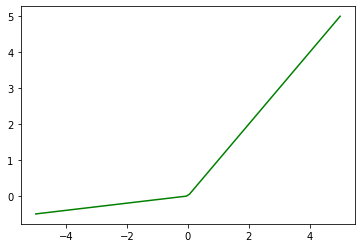

In [24]:
#define the function
def leaky_relu_function(x):
    if x<0:
        return 0.1*x
    else:
        return x
    
#define the f(x) values
y = [leaky_relu_function(i) for i in x]

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

7. **Parameterised ReLU Function**

    This is another variant of ReLU that aims to solve the problem of gradient’s becoming zero for the left half of the axis. 
    
    The parameterised ReLU, as the name suggests, introduces a new parameter as a slope of the negative part of the function.  

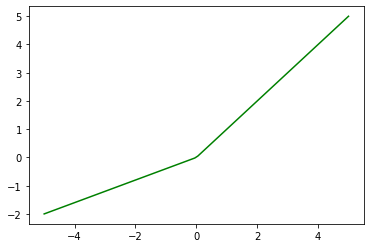

In [26]:
#define the function
def leaky_relu_function(x, alpha):
    if x<0:
        return alpha*x
    else:
        return x
    
#define the f(x) values
alpha = 0.4
y = [leaky_relu_function(i,alpha) for i in x]

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

8. **Exponential Linear Unit Function**

    Exponential Linear Unit or ELU for short is also a variant of Rectiufied Linear Unit (ReLU) that modifies the slope of the negative part of the function. 
    
    Unlike the leaky relu and parametric ReLU functions, instead of a straight line, ELU uses a log curve for defning the negatice values.

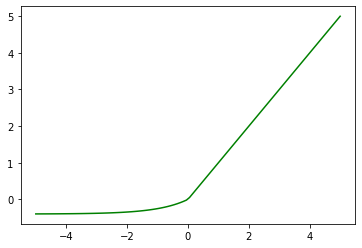

In [28]:
#define the function
def elu_function(x, alpha):
    if x<0:
        return alpha*(np.exp(x)-1)
    else:
        return x
    
#define the f(x) values
alpha = 0.4
y = [elu_function(i,alpha) for i in x]

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

9. **Swish Function**

    Swish is a lesser known activation function which was discovered by researchers at Google. 
    
    Swish is as computationally efficient as ReLU and shows better performance than ReLU on deeper models.  
    
    The values for swish ranges from negative infinity to infinity. 

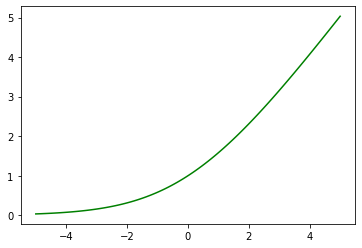

In [36]:
#define the function
def swish_function(x):
    return x/(1-np.exp(-x))
    
#define the f(x) values
x = np.linspace(-5,5,100)
y = [swish_function(i) for i in x]

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

10. **Softmax Function**

    Softmax function is often described as a combination of multiple sigmoids. 
    
    We know that sigmoid returns values between $0$ and $1$, which can be treated as probabilities of a data point belonging to a particular class. 
    
    Thus sigmoid is widely used for binary classification problems.
    
    The softmax function can be used for multiclass classification problems. 
        
    This function returns the probability for a datapoint belonging to each individual class.
    
    Here is the mathematical expression of the softmax function:
    
    $$\sigma(z)_j = \frac{\exp{z_j}}{\sum_{k=1}^{K} \exp{z_k}} \text{ for } k = 1, ..., K.$$

In [38]:
#define the function
def softmax_function(x):
    z = np.exp(x)
    z1 = z/z.sum()
    return z1
    
#define the f(x) values
softmax_function([0.8, 1.2, 3.1])

array([0.08021815, 0.11967141, 0.80011044])

<h3 align="center">Choosing the right Activation Function</h3>

- Depending upon the properties of the problem we might be able to make a better choice for easy and quicker convergence of the network:

  - **Sigmoid** functions and their combinations generally work better in the case of **classifiers**.
  
  - **Sigmoids** and **Tanh** functions are **sometimes avoided** due to the **vanishing gradient problem**.
  
  - **ReLU** function is a general activation function and **is used in most cases** these days.
  
  - **Leaky ReLU** function is the best choice if we encounter a case of **dead neurons** in our networks.

 
  <img src="images/L7_Activation_Functions.jpg" width="800" alt="Example" />


- **Question**: Can we do without an activation function?
  
  A **neural network** **without** an **activation function** is essentially just a **linear regression model**.

<h3 align="center">Feed-forward Network Functions</h3>

- Lets consider the **basic neural network model**, which can be described a series of functional transformations.


- First we construct $M$ linear combinations of the input variables $\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_D$ in the form:

  $$a_j = \sum_{i=1}^{D} w_{ji}^{(1)}x_i + w_{j0}^{(1)},$$
  
  where $j = 1, ..., M$ and the **superscript (1)** indicates that the corresponding parameters are in the **first layer** of the network.
  
  $a_j$ are known as **activations**.

<img src="images/L7_Basic_Neural_Network.png" width="500" alt="Example" />


- Each of **activations** is then **transformed** using a **differentiable**, **nonlinear activation function** $h(\cdot)$ to give:

  $$z_j = h(a_j).$$
  
  $h(\cdot)$, in the context of neural networks, are called **hidden units**.
  
  The **nonlinear functions** $h(\cdot)$ are generally **chosen** to be **sigmoidal function**s such as the **logistic sigmoid** or the **tanh**.
  
  
- Lets now use these values are again linearly combined to give **output unit activations**:

  $$a_k = \sum_{j=1}^{M} w_{kj}^{(2)}z_j + w_{k0}^{(2)}$$
  
  where $k = 1, ..., K$ and $K$ is the **total number of outputs**.
  
  This **transformation corresponds** to the **second layer** of the network.


- Finally, the **output unit activations** are transformed using an **appropriate activation function** to give a **set of network outputs** $y_k$:


- For standard **regression problems**, the activation function is the **identity** so that:


  $$y_{k} = a_k.$$
   
- For multiple binary **classification problems**, each **output unit activation** is transformed using a **logistic sigmoid function** so that:
  
  $$y_k = \sigma(a_k),$$
    
  where
    
  $$\sigma (a) = \frac{1}{1 + \mathrm{exp}(-a)}.$$
  
  


<h3 align="center">Multilayer Perceptron</h3>

- We can combine the various stages and get **overall network function** (for example for sigmoidal output unit activation functions), that has form:

  $$y_k(\mathbf{x}, \mathbf{w}) = \sigma \left ( \sum_{j=1}^{M} w_{jk}^{(2)} h \left( \sum_{i=1}^{D} w_{ji}^{(1)}x_i + w_{j0}^{(1)}  \right) w_{k0}^{(2)} \right ).$$
  
  or, **absorbing** the bias parameters into the set of weight parameters by defining an additional input variable, the above expressions takes form:
  
  $$a_i = \sum_{i=0}^{D} w_{ji}^{(1)} x_i,$$

  and
  
  $$y_k(\mathbf{x}, \mathbf{w}) = \sigma \left ( \sum_{j=0}^{M} w_{jk}^{(2)} h \left( \sum_{i=0}^{D} w_{ji}^{(1)}x_i   \right) \right ).$$


- The **neural network model** comprises **two stages of processing**, each of which resembles the **perceptron model**.


- For this reason the neural network is also known as the **multilayer perceptron (MLP)**.


- **A key difference** compared to the perceptron, is that the **neural network uses continuous sigmoidal nonlinearities in the hidden units**, whereas the **perceptron uses step-function nonlinearities**.


- The **neural network function** is **differentiable** with respect to the **network parameters**. This property plays a central role in network training.

<h3 align="center">Capability of a Multilayer Perceptron</h3>

- A **two-layer network** with linear outputs can uniformly **approximate any continuous function** on a compact input domain to arbitrary accuracy provided the network has a sufficiently large number of hidden units.


- Below, a **multilayer perceptron** to approximate four different functions:
  - (a) $f(x) = x^2$
  - (b) $f(x) = \sin(x)$
  - (c) $f(x) = |x|$
  - (d) $f(x) = H(x)$, where $H(x)$ is the **Heaviside** step function.
  

- The **resulting network functions** are shown by the **red curves**;
- The **outputs** of the 3 **hidden units** are shown by the three **dashed curves**.

<img src="images/L7_Capability_of_MLP.png" width="700" alt="Example" />


<h3 align="center">Network Training</h3>

- **How to determine the network parameters**? 

  Same as for polynomial curve fitting: **minimize a sum-of-squares error function**.
 

- Lets given a training set comprising a set of **input vectors** $\{\mathbf{x}_n\}$, where $n = 1, ..., N$, together with a corresponding set of **target vectors** $t_n$ we **minimize the error function**:

  $$E_{\mathbf{w}} = \frac{1}{2} \sum_{n=1}^{N} || y(\mathbf{x}_n, \mathbf{w}) - t_n||^2.$$
  
  
- Lets assume that $t$ **has a Gaussian distribution**:

  $$p(t | \mathbf{x, w}) = \mathcal{N}(t | y(\mathbf{x,w}), \beta^{-1}),$$
 
  where $\beta$ is the **precision** (inverse variance) of the **Gaussian noise**.
  
  
- If **input vectors** are **identically distributed observations** $\mathbf{X} = \{\mathbf{x}_1, ..., \mathbf{x}_n\}$, along with corresponding target values $\mathbf{t} = \{t_1, ..., t_n\}$, then:

  $$p(\mathbf{t}| \mathbf{X}, \mathbf{w}, \beta) = \prod_{n=1}^{N} p(t_n | \mathbf{x_n}, \mathbf{w}, \beta).$$
  
  Taking the negative logarithm, we obtain the error function:
  
  $$\frac{\beta}{2} \sum_{n=1}^{N} \{y(\mathbf{x}_n , \mathbf{w}) - t_n\}^2 - \frac{N}{2} \ln \beta + \frac{N}{2} \ln (2\pi),$$
  
  which **can be used** to **learn the parameters** $\mathbf{w}$ and $\beta$.
  

- The value of $\mathbf{w}$ can be found by minimizing the $E(\mathbf{w})$.


- Lets denote the solution by $\mathbf{w}_{\mathrm{ML}}$, because **it corresponds to the maximum likelihood solution**.


- Having found $\mathbf{w}_{\mathrm{ML}}$, the value of $\beta$ **can be found** by **minimizing the negative log likelihood** to give:

  $$\frac{1}{\beta_{\mathrm{ML}}} = \frac{1}{N} \sum_{n=1}^{N} \{ y(\mathbf{x}_n, \mathbf{w}_{\mathrm{ML}}) - t_n\}^2.$$
  



<h3 align="center">Parameter Optimization</h3>

- How to finding a **weight vector** $\mathbf{w}$ which **minimizes the chosen function** $E(\mathbf{w})$?

  Because the error $E(\mathbf{w})$ is a smooth continuous function of $\mathbf{w}$ we can we can equate the gradient to zero:
  
  $$\nabla E(\mathbf{w}) = 0$$

- Clearly there is **no hope** of **finding an analytical solution** to this equation.


- Therefore we use **sequential algorithms** such as **gradient decsent method**, or **stochastic gradient descent method**.


- **Note**: there may be (almost allways) **multiple stationary points** and in particular **multiple minima**.

<img src="images/L7_Multiple_OP.png" width="500" alt="Example" />



<h3 align="center">Error Backpropagation</h3>

- Lets find an **efficient technique** for **evaluating the gradient of an error function $E(\mathbf{w})$** for a **feed-forward neural network**.


- This technique is using a **local message passing scheme** in which **information** is **sent** alternately **forwards** and **backwards** through the network and is known as **error backpropagation**.


- Most **training algorithms** involve an **iterative procedure** for **minimization of an error function**, with adjustments to the weights being made in a **sequence of steps**.
- At **each step**, we can distinguish between **two distinct stages**:
  - In the **first stage**, the **derivatives of the error function** with respect to the weights **must be evaluated**.
  - In the **second stage**, the **derivatives** are **used to compute** the **adjustments** to be made to the **weights**. 
  
  
- Many **error functions** of practical interest, for instance those defined by maximum likelihood for a set of **i.i.d. data**, **comprise a sum of terms**, **one for each data point** in the training set, so that:

  $$E(\mathbf{w}) = \sum_{n=1}^{N} E_n(\mathbf{w}).$$
  
  
- Lets consider first a **simple linear model** in which the outputs $y_k$ are linear combinations of the input variables $\mathbf{x}_i$ so that:

  $$y_k = \sum_{n=1}^{N} w_{ki} x_i.$$
  
  An error function takes the form:
  
  $$E_n = \frac{1}{2} \sum_{k} (y_k(\mathbf{x}_n, \mathbf{w}) - t_{nk})^2 = \frac{1}{2} \sum_{k} (y_{nk} - t_{nk})^2.$$
  
- The **gradient of an error function** with respect to a weight $w_{ji}$ is given by:

  $$\frac{\partial E_n}{\partial w_{ji}} = (y_{nj} - t_{nj}) x_{ni}.$$
  
  
- In a **general feed-forward network**, each **unit** computes a weighted sum of its inputs of the form:

  $$a_j = \sum_{i} w_{ji} z_i,$$
  
  where $z_i$ is the **activation of a unit**, that **sends a connection to unit $j$**, and $w_{ji}$ is the **weight associated with that connection**.
  

- Note that $E_n$ **depends on the weight** $w_{ji}$ **only via the summed input** $a_j$ to unit $j$, therefore we can write:

  $$\frac{\partial E_n}{ \partial {w_{ji}}} = \frac{\partial E_n}{\partial a_j} \frac{\partial a_j}{\partial w_{ji}}.$$
  
  Lets introduce a useful notation:
  
  $$\delta_j \equiv \frac{\partial E_n}{\partial a_j}.$$
  
  Using:
  
  $$\frac{\partial a_j}{\partial w_{ji}} = z_i$$
  
  we can finally obtain:
  
  $$\frac{\partial E_n}{\partial w_{ji}} = \delta_j z_i.$$
  
- Thus, **in order to evaluate the derivatives**, we need **only to calculate the value of $\delta_j$** for each **hidden and output** unit in the network.

- For the output units we have:

  $$\delta_k = y_k - t_k$$.

- For the hidden units we have:

  $$\delta_j \equiv \frac{\partial E_n}{\partial a_j} = \sum_{k} \frac{\partial E_n}{\partial a_k} \frac{\partial a_k}{\partial a_j},$$
  
  where the **sum** runs **over all units** $k$ **to which unit $j$ sends connections**.
 

- Finally, we obtain the following **backpropagation formula**:

  $$\delta_j = h'(a_j) \sum_{k} w_{kj}\delta_k$$
  
  which tells us that the **value of $\delta$** for a particular hidden unit **can be obtained by propagating the $\delta$'s backwards** from units higher up in the network.
  

<h3 align="center">The Backpropagation Procedure</h3>

<img src="images/L7_Hidden_Layer.png" width="300" alt="Example" />


The **backpropagation procedure** can be summarized as follows:

- Apply an input vector $x_n$ to the network and forward propagate through the network using:

  $$a_j = \sum_{i} w_{ji} z_i \textrm{ and } z_j = h(a_j)$$
  to find the **activations** of all the **hidden** and **output units**.

- Evaluate the $\delta_k$ for all the **output units** using:

  $$\delta_k = y_k - t_k$$
 
- Backpropagate the $\delta$'s using:

  $$\delta_j = h'(a_j) \sum_{k} w_{kj}\delta_k$$
  to obtain $\delta_j$ for each **hidden unit** in the network.
  
- Finally, to **evaluate the required derivatives**, use:

  $$\frac{\partial E_n}{\partial w_{ji}} = \delta_j z_i.$$
  

<h3 align="center">A Simple Example</h3>

- Lets assume that the **hidden units** have **logistic sigmoid activation functions** given by:

  $$h(a) \equiv \mathrm{tahn}(a),$$
  
  where 
  
  $$\mathrm{tahn}(a) = \frac{e^{a} - e^{-a}}{e^{a} + e^{-a}}.$$
  
  A useful feature of this function is:

  $$h'(a) = 1 - h(a)^2$$<br>
  
  
- Lets Considering the **standard sum-of-squares error function**:
  
  $$E_n = \frac{1}{2} \sum_{k=1}^{K} (y_k - t_k)^2$$

  where $y_k$ is the **activation of output unit** $k$, and $t_k$ is the corresponding target, for a particular input pattern $\mathbf{x}_n$.

- **For each pattern** in the training set in turn, we:

  - **perform a forward propagation** using:
    $$a_j = \sum_{i=0}^{D} w_{ji}^{(1)}x_i$$,
    $$z_j = \mathrm{tahn}(a_j)$$,
    $$y_k = \sum_{j=0}^{M} w_{kj}^{(2)} z_j$$.

  - **compute the $\delta_k$** for **each output unit** using:
    
    $$\delta_k = y_k - t_k$$<br>
  
  - **backpropagate** these to **obtain $\delta_j$** for the **hidden units** using:
  
    $$\delta_j = (1 - z_j^2) \sum_{k=1}^{K} w_{kj}\delta_k.$$<br>
    
  - **obtain the derivatives** with respect to the **first-layer** and **second-layer**:
  
    $$\frac{\partial E_n}{\partial w_{ji}^{(1)}} = \delta_j x_i,$$
    $$\frac{\partial E_n}{\partial w_{kj}^{(2)}} = \delta_k z_j.$$
  
  

<h3 align="center">Main Types of Neural Networks</h3>


<img src="images/L7_Architectures.png" width="1000" alt="Example" />




<h1 align="center">End of Lecture</h1>